### AI Developer in wonderland !! "Late, always late !"
Parcours de graphes : Dijstra et labyrinthe

#### Parcours d'un graphe en profondeur:
DFS (Depth First Search)

In [469]:
import random

def dfs(G,s) :
    P,Q={s :None},[s]
    while Q :
        u=Q[-1]
        R=[y for y in G[u] if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
    return P

In [470]:
G = dict()
G['a'] = ['b','c']
G['b'] = ['a','d','e']
G['c'] = ['a','d']
G['d'] = ['b','c','e']
G['e'] = ['b','d','f','g']
G['f'] = ['e','g']
G['g'] = ['e','f','h']
G['h'] = ['g']

In [471]:
dfs(G, 'g')

{'g': None,
 'f': 'g',
 'e': 'f',
 'd': 'e',
 'c': 'd',
 'a': 'c',
 'b': 'a',
 'h': 'g'}

#### Parcours en largeur: 
(Breadth First Search)
Une liste Q utilisée comme file (FIFO) : on enfile un sommet lorsqu'il est découvert et on le défile lorsqu'il est terminé (traitement prioritaire des sommets découverts au plus tôt).

In [472]:
def bfs(G,s) :
    P,Q={s :None},[s]
    while Q :
        u=Q.pop(0)
        for v in G[u] :
            if v in P : continue
            P[v]=u
            Q.append(v)
    return P

In [473]:
bfs(G,'b')

{'b': None,
 'a': 'b',
 'd': 'b',
 'e': 'b',
 'c': 'a',
 'f': 'e',
 'g': 'e',
 'h': 'g'}

#### Dijstra :

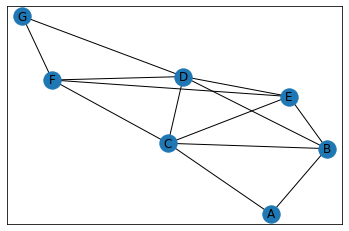

etape : 1
Les chemins possibles sont : {'A': 0, 'B': {'A': 2}, 'C': {'A': 1}}
les destinations avec le nouveau sommet seléctionné et la distance totale sont : {'A': 0, 'C': 1}
la distance est : 1
etape : 2
Les chemins possibles sont : {'B': {'A': 2}, 'C': {'A': 1}, 'D': {'C': 5}, 'E': {'C': 4}, 'F': {'C': 6}}
les destinations avec le nouveau sommet seléctionné et la distance totale sont : {'A': 0, 'C': 1, 'B': 2}
la distance est : 2
etape : 3
Les chemins possibles sont : {'B': {'A': 2}, 'D': {'B': 3}, 'E': {'C': 4}, 'F': {'C': 6}}
les destinations avec le nouveau sommet seléctionné et la distance totale sont : {'A': 0, 'C': 1, 'B': 2, 'D': 3}
la distance est : 3
etape : 4
Les chemins possibles sont : {'D': {'B': 3}, 'E': {'C': 4}, 'F': {'C': 6}, 'G': {'D': 8}}
les destinations avec le nouveau sommet seléctionné et la distance totale sont : {'A': 0, 'C': 1, 'B': 2, 'D': 3, 'E': 4}
la distance est : 4
etape : 5
Les chemins possibles sont : {'E': {'C': 4}, 'F': {'E': 5}, 'G': {'D': 8}}
le

In [474]:
import copy	
import matplotlib.pyplot as plt

Graphe_ = { 
      'A':{'B':2, 'C':1}, 
      'B':{'A':2, 'C':2, 'D':1, 'E':3}, 
      'C':{'A':1, 'B':2, 'D':4, 'E':3, 'F':5}, 
      'D':{'B':1, 'C':4, 'E':3, 'F':6, 'G':5}, 
      'E':{'B':3, 'C':3, 'D':3, 'F':1}, 
      'F':{'C':5, 'D':6, 'E':1, 'G':2}, 
      'G':{'D':5, 'F':2} 
      }

Graphe2 = { 
      'A':{'E':14,'B':7}, 
      'B':{'C':8}, 
      'C':{'D':6}, 
      'D':{'A':18, 'F':11}, 
      'E':{'F':19}, 
      'F':{'G':4, 'H':13}, 
      'G':{'C':5, 'H':8},
      'H':{'C':9} 
      }

# noeuds = Graphe_
# arcs   = {('A', 'B'): None,('A', 'C'): None}

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def plot_graph(Graph):
    
    g = nx.Graph()
    g.add_nodes_from(list(Graph))
    for node, edges in Graph.items():
        g.add_edges_from(([(node, edge) for edge in edges]))
    return nx.draw_networkx(g)

fig1 = plot_graph(Graphe_)
plt.show()

class graph:
       
    def dijstra(graphe, debut,fin):
        graph = copy.deepcopy(graphe)
        dist = 0    
        s_sel = copy.deepcopy(debut)  # chemin sélectionné   
        chemins = {s_sel:0}
        chemins_save = copy.deepcopy(chemins)    
        destinations = {s_sel:dist}
        sommets=[s_sel] # liste des sommets sélectionnés
        first = True
        for i in range(len(graph.items())-1):
            if s_sel != fin:
                #mise à jour de chemin
                for s, d in graph[s_sel].items():
                    if s not in chemins :            
                        chemins[s] = {s_sel:dist+d}
                        chemins_save[s] = {s_sel:dist+d}
                    for k , v in chemins[s].items():
                        if v > dist+d:
                            chemins[s] = {s_sel:dist+d} 
                            chemins_save[s] = {s_sel:dist+d} 
                        # chemins = {'A':0,'B':{'A':2},'C':{'A':1}}
                        # On peut aller vers B venant de A et la distance est de de 2
                        # On peut aller vers C venant de A et la distance est de 1
                print('etape :',i+1)
                print('Les chemins possibles sont :',chemins)
                #supprimer les sommets dejà parcourus
                for s in sommets:
                    if s in chemins:
                        del(chemins[s])
                #trouver le min dans la liste des sommets possibles
                for s, d in chemins.items():
                    for k, v in d.items():
                        if first == True:
                            first = False
                            val_min = copy.deepcopy(v)
                        if v <= val_min:
                            val_min = v
                            s_sel_new = s
                first = True
                sommets.append(s_sel_new) #sommets à ignorer deja parcourus 
                dist = val_min
                for dest in destinations:
                    if dest in graph[s_sel_new]:
                        del graph[s_sel_new][dest]        
                destinations[s_sel_new]=dist #rajout du sommet selectionné et de la distance totale
                s_sel=s_sel_new    
                print('les destinations avec le nouveau sommet seléctionné et la distance totale sont :', destinations)
                print('la distance est :', dist)
        print('les chemins les plus courts sont : ',chemins_save)
        #pour retrouver le chemin le plus court dans chemins_save
        parcours = [fin]
        while k != debut:
            for k,v in chemins_save[fin].items():
                parcours.append(k)
            fin = k
        if len(parcours) == 1:
            parcours.append(debut)
        print('Voici le chemin le plus court :',parcours[::-1])
        print('et la distance est de :',dist)            
        
        return parcours[::-1],dist

shortest , dist = graph.dijstra(Graphe_,'A','G')
#print(shortest)
#print(dist)

#### Labyrinthe : 

##### Création du labyrinthe : 
Méthode de fusion de cellules avec matrices

In [475]:
import random
import numpy as np
import copy

# Fusion aléatoire

def lab_new(X, Y):
    global wall_cell
    dir_x = {'N':0,'S':0,'E':1,'O':-1}
    dir_y = {'N':1,'S':-1,'E':0,'O':0}
    lab = [[(x+X*y) for x in range(X)] for y in range(Y)]
    wall_cell = [[0 for x in range(2*X+1)] for y in range(2*Y+1)]
    for y in range(len(wall_cell)-1):
        for x in range(len(wall_cell[y])-1):
            if x % 2 != 0 and y % 2 != 0:
                wall_cell[y][x] = 1

    wall_opened = 0

    while wall_opened < X*Y-1:
        (cellx, celly) = ((random.randrange(X)), (random.randrange(Y)))
        sens = random.choice(['N','S','O','E'])
        newcellx = cellx + dir_x[sens]
        newcelly = celly + dir_y[sens]
        if newcellx >= 0 and newcellx < X and newcelly >= 0 and newcelly < Y:
            if lab[newcelly][newcellx] != lab[celly][cellx]:
                #creation d'un chemin entre 2 cellules voisines
                wall_cell[celly+newcelly+1][cellx+newcellx+1] = 1
                value = lab[newcelly][newcellx]
                for y in range(Y):
                    for x in range(X):
                        if lab[y][x] == value:
                            lab[y][x] = lab[celly][cellx]
                wall_opened += 1
    #choix aleatoire des entree / sortie 
    choice  = random.randrange(2)
    if choice == 0:
        #option Nord / sud:
        wall_cell[0][2*random.randrange(X)+1] = 2  
        wall_cell[2*Y][2*random.randrange(X)+1] = 3  
    else :
        #option Est / Ouest:
        wall_cell[2*random.randrange(Y)+1][0] = 2  
        wall_cell[2*random.randrange(Y)+1][2*X] = 3  
    
    wall_cell_save = copy.deepcopy(wall_cell)    
    return wall_cell, wall_cell_save

wall_cell = lab_new(2, 2)
print(wall_cell)
print('2 correspond à l\'entree, 3 la sortie, 0 un mur et 1 une cellule')

([[0, 0, 0, 0, 0], [2, 1, 1, 1, 3], [0, 1, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0], [2, 1, 1, 1, 3], [0, 1, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 0, 0, 0]])
2 correspond à l'entree, 3 la sortie, 0 un mur et 1 une cellule


In [414]:
# Fonction pour se déplacer dans le labyrinthe
def move(i,x,y, location, xWindow, yWindow, wall_cell):
    global finish   
    case = [(y-1),(y+1),(x-1),(x+1)]
    wall_cell[y][x] = 4
    if (case[i] >= 0 or case[i] < yWindow / 10) and (i == 0 or i == 1):
    #On vérifie si la futur position est vide (au quel cas on pourra se déplacer)
        if wall_cell[case[i]][x] == 1:
            wall_cell[case[i]][x] = 2 #entrée dans une nouvelle cellule
            location.append((x,case[i]))#on rajoute la cellule visitée
        # Fin de l'algo
        elif wall_cell[case[i]][x] == 3:
            finish = True
        if i == 0:#  up        
            if wall_cell[case[i]][x] in [4,5]:
                wall_cell[case[i]-3][x] = 2 #entrée dans une nouvelle cellule
                location.append((x,case[i]-3))
        elif i == 1: #down
            if wall_cell[case[i]][x] in [4,5]:
                wall_cell[case[i]+3][x] = 2
                location.append((x,case[i]+3))
    if (case[i] >= 0 or case[i] < xWindow / 10) and (i == 2 or i == 3):
        #On vérifie si la futur position est vide (au quel cas on pourra se déplacer)
        if wall_cell[y][case[i]] == 1:
            wall_cell[y][case[i]] = 2
            location.append((case[i],y))
        # Fin de l'algo
        elif wall_cell[y][case[i]] == 3:
            finish = True                 
        if wall_cell[y][case[i]] in [4,5]:   
            if i == 2:#  left 
                wall_cell[y][case[i]-3] = 2
                location.append((case[i]-3,y))
            elif i == 3:#  right  
                wall_cell[y][case[i]+3] = 2
                location.append((case[i]+3,y))

In [478]:
import pygame
from pygame.locals import *

import random
import time
from time import time

pygame.init()
clock = pygame.time.Clock()

X_direction = {'N':0,'S':0,'E':1,'O':-1}
Y_direction = {'N':-1,'S':1,'E':0,'O':0}
on = True
end = False
delay = 0
one = True

def window(x, y):
    global wall_cell, xWindow, yWindow, window, wall_cell_save
    #creation du labyrinthe
    wall_cell, wall_cell_save = lab_new(x,y)
    # Pour tester l'algo "move_strategy" (A droite d'abord ...) sur le meme labyrinthe commentez la ligne precedente
    # et decommenter la ligne suivante et faites de meme sur le ligne "random.choice"
    #wall_cell = wall_cell_save
    xWindow = x*20+10
    yWindow = y*20+10
    window = pygame.display.set_mode( (xWindow, yWindow) )
    return wall_cell
   
window(60,30)

one = True

def colorset(color):
    rect = pygame.Rect(x*10, y*10, 10, 10)
    pygame.draw.rect(window, (color), rect)

colors = [(206,206,206),(255,255,255),(0,128,0),(240,128,128),(176,242,162),(226,252,251)]

start = time()

# 0 => mur
# 1 => cellule
# On travaille avec des matrices wall_cell (labyrinthe)  et ici x => colonnes et y => lignes

while on:
    # On affiche à 60 hz sur fond blanc
    clock.tick(60)
    window.fill((255,255,255))
    # Actualisation de l'affichage du labyrinthe
    for y in range(len(wall_cell)): 
        for x in range(len(wall_cell[y])):
                if wall_cell[y][x] == 2:# entrée
                    if one == True:
                        location = [(x, y)] # initialisation de location (tuple) au demarrage                        
                        one = False
                    colorset(colors[2])                
                elif wall_cell[y][x] == 3:#sortie vert fonce
                    colorset(colors[3]) 
                elif wall_cell[y][x] == 0:#mur gris
                    colorset(colors[0])
                elif wall_cell[y][x] == 1:#cellule blanc
                    colorset(colors[1])
                elif wall_cell[y][x] == 4:#chemin vert clair
                    colorset(colors[4])
                elif wall_cell[y][x] == 5:#retour bleu clair
                    colorset(colors[5])
    if end == False:
        if location != []:
            (px, py) = location[-1]
            dir_neighbour = [] 
            # Tant que l'on ne trouve pas la cellule fin on continue
            for direction in ['N','S','O','E']:
                # A chaque etape, on verifie les cellules alentours
                nvx = px + X_direction[direction]
                nvy = py + Y_direction[direction]
                if nvx >= 0 and nvx < xWindow/10 and nvy >= 0 and nvy < yWindow/10:
                    # Cellule non visitée , on l'ajoute comme une cellule à visiter
                    if wall_cell[nvy][nvx] == 1: 
                        dir_neighbour.append(direction)
                    # Fin de l'algo
                    if wall_cell[nvy][nvx] == 3:
                        end = True
                        time_to_find_exit = time() - start
                        print('time_to_find_exit :',round(time_to_find_exit,2))
                        break
            if len(dir_neighbour) > 0:                                                
                # S'il reste des cellules a visiter , on en choisit une au hasard
                d = random.choice(dir_neighbour)
                # Autre strategie de deplacement (privilegie le deplacement d'abord à droite, tout enfin a gauche)
                #d = move_strategy(location,dir_neighbour)
                if d == 'N':
                    i=0
                elif d == 'S':
                    i=1
                elif d == 'O':
                    i=2
                elif d == 'E':
                    i=3                    
                move(i,px, py, location, xWindow, yWindow, wall_cell)
            else:                                                               
                # Sinon on recule d'une cellule et on note la cellule précédente comme deja visitée
                (tx, ty) = location.pop()#on enleve de location la cellule visitée
                # A la fin de l'algo location contient les coordonnées x,y du chemin de sortie du labyrinthe
                wall_cell[ty][tx] = 5                
    # Gestion de l'affichage    
    pygame.display.flip() 
    for event in pygame.event.get():        
        if event.type == QUIT or (event.type == KEYUP and event.key == K_ESCAPE):
            on = False    
pygame.quit()

time_to_find_exit : 75.52


In [477]:
def move_strategy(location,dir_neighbour):
    # Sens du deplacement
    # location :
    # Si (0, 17), (1, 17) => deplacement horizontal suivant x (y fixe)  vers l'Est : x = x+1
    # Si (1, 17), (0, 17) => deplacement horizontal suivant x (y fixe)  vers l'Ouest : x = x-1
    # Si (1, 17), (1, 16) => deplacement vertical suivant y (x fixe)  vers le Nord : y = y-1
    # Si (0, 15), (1, 16) => deplacement vertical suivant y (x fixe) vers le Sud : x = y+1
    if len (location) > 1:
        y1,x1 = location[-2]
        y2,x2 = location[-1]
        if y1-y2 == -1 and x1-x2 == 0:
            sens_deplacement = 'E'
            dir_choice = ['S','E','N','O']
        elif y1-y2 == 1 and x1-x2 == 0:
            sens_deplacement = 'O'
            dir_choice = ['N','O','S','E']
        elif y1-y2 == 0 and x1-x2 == 1:
            sens_deplacement = 'N'
            dir_choice = ['E','N','O','S']
        elif y1-y2 == 0 and x1-x2 == -1:
            sens_deplacement = 'S'
            dir_choice = ['O','S','E','N']
        
        for choice in  dir_choice:
            if choice in dir_neighbour:
                d = choice 
    else :
        d = dir_neighbour[0]
            
    return d